# Convolutional Neural Network with Augmented Data
----

## Set Up

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionß
from sklearn.metrics import confusion_matrix
import random

import joblib
import math


In [4]:
# Set random seeds for reproducibility
tf.random.set_seed(1)
np.random.seed(1)

In [5]:
# connect to google drive -> required for input image later
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## Data Loading

In [6]:
# X  = joblib.load( '/content/drive/My Drive/Colab Notebooks/Capstone/my_files/X.pkl' )
# y = joblib.load( '/content/drive/My Drive/Colab Notebooks/Capstone/my_files/y.pkl' )
X  = joblib.load( '../../model/my_files/X.pkl' )
y = joblib.load( '../../model/my_files/y.pkl' )

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28,28,-1)
X_val = X_val.reshape(X_val.shape[0], 28,28,-1)

In [9]:
X_val.shape

(6926, 28, 28, 1)

In [10]:
alphabet = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
unique_values, value_counts = np.unique(y, return_counts=True)

## Data Augmentation

In [13]:
train_datagen = joblib.load('../../model/my_files/train_datagen.pkl') 
val_datagen = joblib.load('../../model/my_files/val_datagen.pkl') 

In [16]:
from tensorflow.keras.models import load_model
CNN_model = load_model('../../model/my_files/my_CNN_model_13.1.h5')

## Passing augmented data into CNN Model

In [17]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [18]:
history = CNN_model.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=10,
                        validation_data=val_generator,
                        validation_steps=len(val_generator)
            )

Epoch 1/10


2024-06-29 22:43:57.480707: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


866/866 [==============================] - 9s 10ms/step - loss: 1.9872 - accuracy: 0.4146 - val_loss: 1.1197 - val_accuracy: 0.6805
Epoch 2/10
866/866 [==============================] - 9s 10ms/step - loss: 1.1407 - accuracy: 0.6156 - val_loss: 0.5923 - val_accuracy: 0.7943
Epoch 3/10
866/866 [==============================] - 9s 10ms/step - loss: 0.8943 - accuracy: 0.6937 - val_loss: 0.4705 - val_accuracy: 0.8449
Epoch 4/10
866/866 [==============================] - 9s 10ms/step - loss: 0.7718 - accuracy: 0.7337 - val_loss: 0.5204 - val_accuracy: 0.8158
Epoch 5/10
866/866 [==============================] - 9s 10ms/step - loss: 0.6650 - accuracy: 0.7690 - val_loss: 0.6043 - val_accuracy: 0.8065
Epoch 6/10
866/866 [==============================] - 9s 10ms/step - loss: 0.6155 - accuracy: 0.7896 - val_loss: 0.1534 - val_accuracy: 0.9469
Epoch 7/10
866/866 [==============================] - 9s 10ms/step - loss: 0.5565 - accuracy: 0.8090 - val_loss: 0.1189 - val_accuracy: 0.9597
Epoch 8/10

In [ ]:
train_loss, train_acc = CNN_model.evaluate(train_generator)
print('Train accuracy:', train_acc)

866/866 [==============================] - 20s 23ms/step - loss: 0.6510 - accuracy: 0.7800
Train accuracy: 0.7800079584121704


In [ ]:
val_loss, val_acc = CNN_model.evaluate(val_generator)
print('Val accuracy:', val_acc)

217/217 [==============================] - 2s 10ms/step - loss: 0.1748 - accuracy: 0.9454
Test accuracy: 0.9454230666160583


**Comment:**

See such a differnce here between the train and the validation results as the validation images were only scaled and so without augmentation the model we built in the previous notebook already has a high performance so the performance on the validation set remains high. 

## Model Performance

#### Confusion Matrix

217/217 [==============================] - 2s 9ms/step


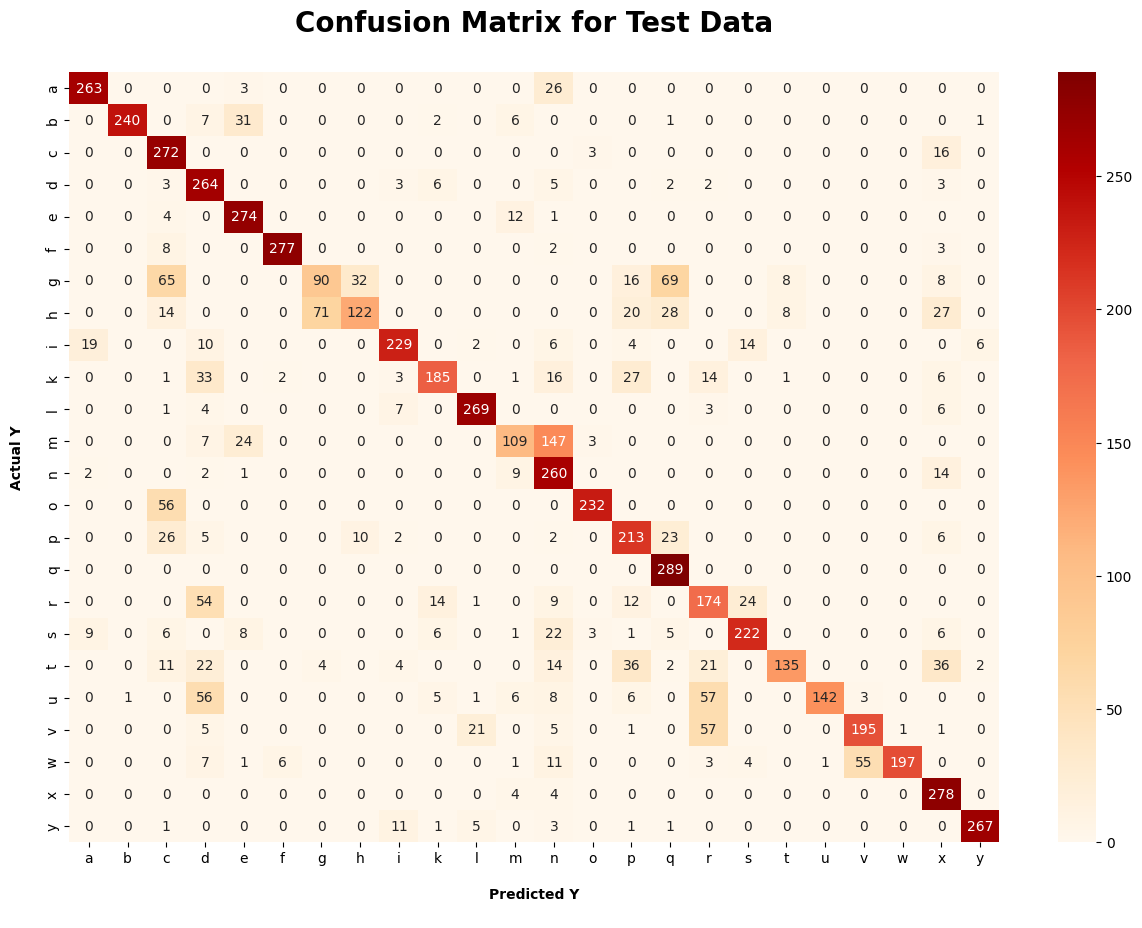

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the predicted labels for each test image.
soft_pred = CNN_model.predict(X_val)
pred_y = np.argmax(soft_pred, axis=1)

# Create the confusion matrix using sklearn
conf_mat = confusion_matrix(y_val, pred_y)

plt.figure(figsize=(15, 10))
sns.heatmap(conf_mat,
            annot=True,
            fmt = 'd',
            cmap="OrRd",
           )
plt.title('Confusion Matrix for Test Data\n', fontsize=20, fontweight = 'bold')
plt.xlabel('\nPredicted Y\n', fontsize=10,fontweight = 'bold')
plt.ylabel('Actual Y\n',fontsize=10, fontweight = 'bold')
plt.xticks([x + 0.5 for x in range(len(unique_values))], alphabet)
plt.yticks([y + 0.5 for y in range(len(unique_values))], alphabet)
plt.show()

#### Train VS Validation Plot

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Test Image

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# loading a test image for ASL sign 'C'
image_path = '/content/drive/My Drive/Colab Notebooks/Capstone/my_files/C.JPG'
input_image = load_img(image_path, target_size=(28, 28))
# Convert image to greyscale
input_image = input_image.convert('L')
# Rotating image to have correct orientation (see below)
input_image = input_image.rotate(270)

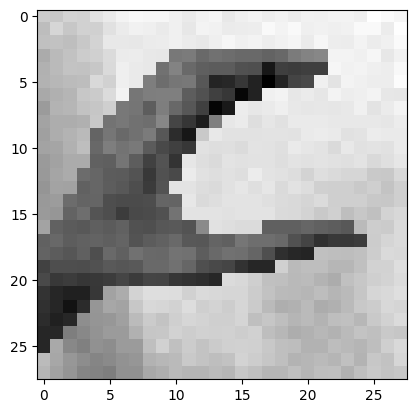

In [ ]:
plt.imshow(input_image,cmap='gray') # checking image has correct orientation
plt.show()

In [ ]:
# Convert the image to a NumPy array
image_array = img_to_array(input_image)

In [ ]:
# Reshaping to have dimesntions (1,28,28,1) -> to match X_train/X_test dimensions
# 1 as only single image is uploaded
test_img = image_array.reshape(1, image_array.shape[0], image_array.shape[1], image_array.shape[2])

In [ ]:
pred = CNN_model.predict(test_img)

1/1 [==============================] - 0s 22ms/step


In [ ]:
pred

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.where(pred[0] == 1)[0][0]

2

In [ ]:
alphabet[np.where(pred[0] == 1)[0][0]]

'c'